# Part 2: Data pre-processing stages

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 10)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import copy
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


**Load dataset**

In [2]:
diab_data_path = r"C:\Users\Matt-\Documents\aacmpsem2\DataMining\cw2\diabetes.csv"

diab = pd.read_csv(diab_data_path)

print(diab.head())
print(diab.shape)

   encounter_id  hospital_id gender  ethnicity   age  elective_surgery  \
0        214826          118      M  Caucasian  68.0                 0   
1        276985          118      F  Caucasian  25.0                 0   
2        262220          118      F  Caucasian  81.0                 1   
3        201746           33      M  Caucasian  19.0                 0   
4        246060           81      F  Caucasian  77.0                 0   

   height  weight        bmi  readmission_status  ... map_apache  aids  \
0   180.3    73.9  22.732803                   0  ...       40.0     0   
1   172.7    95.3  31.952749                   0  ...       68.0     0   
2   165.1    61.7  22.635548                   0  ...       60.0     0   
3   188.0     NaN        NaN                   0  ...      103.0     0   
4   160.0    70.2  27.421875                   0  ...       46.0     0   

   cirrhosis  hepatic_failure  immunosuppression  leukemia  lymphoma  \
0          0                0         

## Drop duplicate rows

In [3]:
# Shows all features to give more accurate impression of whether duplicates are truly the same person
diab.loc[diab.duplicated(keep=False), :]

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
6,195124,83,F,Caucasian,59.0,0,165.1,156.6,57.451002,0,...,138.0,0,0,0,0,0,0,0,1,1
63655,195124,83,F,Caucasian,59.0,0,165.1,156.6,57.451002,0,...,138.0,0,0,0,0,0,0,0,1,1
67151,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
68629,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0


In [4]:
# Dataset's shape prior to dropping duplicates
print('Shape before dropping duplicate rows: ', diab.shape)

Shape before dropping duplicate rows:  (79159, 88)


In [5]:
# Drop duplicate rows
diab = diab.drop_duplicates()
diab

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,...,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,...,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,...,46.0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79154,166024,146,F,Caucasian,86.0,0,167.6,86.2,30.687339,0,...,137.0,0,0,0,0,0,0,0,0,0
79155,185015,154,F,Caucasian,55.0,0,165.1,91.7,33.641487,0,...,59.0,0,0,0,1,0,0,1,0,0
79156,173688,47,M,African American,61.0,0,173.0,88.1,29.436333,0,...,173.0,0,0,0,0,0,0,0,0,0
79157,169835,120,M,Caucasian,80.0,0,175.0,84.8,27.689796,0,...,54.0,0,0,0,1,0,0,0,0,0


In [6]:
# Dataset's shape after dropping duplicates
print('Shape after dropping duplicate rows: ', diab.shape)

Shape after dropping duplicate rows:  (79156, 88)


## Handling missing data

**Creating an array of features with 60% or more values missing (using findings from part 1)**

In [7]:
cols_60_missing = ['d1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
                   'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_min', 
                   'h1_bun_max', 'h1_calcium_max', 'h1_calcium_min','h1_creatinine_max',
                   'h1_creatinine_min', 'h1_hco3_max','h1_hco3_min','h1_hematocrit_max',
                   'h1_hematocrit_min','h1_inr_max', 'h1_inr_min','h1_lactate_max','h1_lactate_min',
                   'h1_sodium_max','h1_sodium_min', 'd1_arterial_po2_max','d1_arterial_po2_min',
                   'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min','h1_arterial_pco2_max',
                   'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
                   'h1_arterial_po2_max', 'h1_arterial_po2_min','h1_pao2fio2ratio_max',
                   'h1_pao2fio2ratio_min', 'bilirubin_apache','paco2_apache']

print('Number of columns: ', len(cols_60_missing))

Number of columns:  38


In [8]:
print('Shape before dropping 60% missing values, ', diab.shape)

Shape before dropping 60% missing values,  (79156, 88)


**Drop columns with 60% missing values**

In [9]:
diab.drop(cols_60_missing, axis=1, inplace=True)
print('Shape after dropping 60% missing values, ', diab.shape)

Shape after dropping 60% missing values,  (79156, 50)


In [10]:
diab.columns

Index(['encounter_id', 'hospital_id', 'gender', 'ethnicity', 'age',
       'elective_surgery', 'height', 'weight', 'bmi', 'readmission_status',
       'icu_type', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max',
       'd1_bun_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min', 'wbc_apache',
       'intubated_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'diabetes_mellitus'],
      dtype='object')

### Grouping features into numerical and categorical prior to imputation

In [11]:
# All columns of data frame
all_cols = diab.columns

# Categorical columns
categ_cols = ['encounter_id', 'hospital_id', 'elective_surgery', 'ethnicity', 'gender', 'readmission_status', 'icu_type', 
              'gcs_eyes_apache', 'gcs_motor_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 
              'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

# Numerical columns
num_cols = ['age', 'height', 'weight', 'bmi', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 
            'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 
            'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_platelets_min', 
            'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 
            'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min', 'wbc_apache', 'd1_heartrate_max', 
            'heart_rate_apache', 'creatinine_apache', 'h1_spo2_max', 'map_apache']

# Target variable
target_col = ['diabetes_mellitus']

print('Numerical: ', len(num_cols))
print('Categorical: ', len(categ_cols))
print('Target: ', len(target_col))

print('All groups added up: ',(len(num_cols))+(len(categ_cols))+len(target_col))

Numerical:  31
Categorical:  18
Target:  1
All groups added up:  50


**Exploratory analysis to see the number of missing numerical and categorical features**

In [12]:
# Configure pandas settings to show all features
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
# All numerical columns containing missing values
diab[num_cols].isnull().sum()

age                   2842
height                1181
weight                2072
bmi                   2690
h1_temp_max          17935
h1_temp_min          17935
d1_albumin_max       43090
d1_albumin_min       43090
d1_bilirubin_max     46474
d1_bilirubin_min     46474
d1_bun_max            7908
d1_bun_min            7908
d1_glucose_min        4357
d1_hco3_max          11899
d1_hco3_min          11899
d1_platelets_max     11164
d1_platelets_min     11164
d1_potassium_max      7185
d1_potassium_min      7185
d1_sodium_max         7613
d1_sodium_min         7613
d1_wbc_max           10477
d1_wbc_min           10477
h1_glucose_max       43770
h1_glucose_min       43770
wbc_apache           17749
d1_heartrate_max       145
heart_rate_apache      156
creatinine_apache    14582
h1_spo2_max           3804
map_apache             228
dtype: int64

In [14]:
# From categorical cols, only ethnicity, gender, gcs_eyes_apache and gcs_motor_apache contain
# missing values
diab[categ_cols].isnull().sum()

encounter_id                      0
hospital_id                       0
elective_surgery                  0
ethnicity                       961
gender                           30
readmission_status                0
icu_type                          0
gcs_eyes_apache                1223
gcs_motor_apache               1223
intubated_apache                  0
ventilated_apache                 0
aids                              0
cirrhosis                         0
hepatic_failure                   0
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
dtype: int64

### Imputation

**First, impute the median of the ordinal discrete categorical variables (gcs_eyes_apache and gcs_motor_apache)**

In [15]:
diab[['gcs_eyes_apache', 'gcs_motor_apache']] = diab[['gcs_eyes_apache', 'gcs_motor_apache']].fillna(diab[['gcs_eyes_apache', 'gcs_motor_apache']].median())

diab.shape

(79156, 50)

**Use value_counts method to check median has been imputed**

In [16]:
diab[categ_cols].isna().sum()

encounter_id                     0
hospital_id                      0
elective_surgery                 0
ethnicity                      961
gender                          30
readmission_status               0
icu_type                         0
gcs_eyes_apache                  0
gcs_motor_apache                 0
intubated_apache                 0
ventilated_apache                0
aids                             0
cirrhosis                        0
hepatic_failure                  0
immunosuppression                0
leukemia                         0
lymphoma                         0
solid_tumor_with_metastasis      0
dtype: int64

**Secondly, use TransformerMixin to impute the mode for categorical features and the mean for numercial features** 

In [17]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):
    
    def __init__(self):
        """        
        Columns in diab[categ_cols] imputed with most frequent value in column.
        
        Columns in diab[num_cols] are imputed with median.       
        
        """
    def fit(self, d, y=None):
        # Find most common value with value_counts() which returns counts in descending order 
        # so that the first element is most frequently occurring.
        self.fill = pd.Series([d[col].value_counts().index[0]
                              
            if d[col].dtype == np.dtype('O') else d[col].median() for col in d], index=d.columns)
            
        return self
        
    def transform(self, d, y=None):
        return d.fillna(self.fill)
    

d = diab[all_cols]
dt = DataFrameImputer().fit_transform(d)

# Missing vals for train data before
print('Before...')
missing_val_count_by_col = (d.isnull().sum())
print("Missing columns: \n", missing_val_count_by_col[missing_val_count_by_col>0])


# Missing vals for train data after
print('After...')
missing_val_count_by_col = (dt.isnull().sum())
print("Missing columns: \n", missing_val_count_by_col[missing_val_count_by_col>0])


Before...
Missing columns: 
 gender                  30
ethnicity              961
age                   2842
height                1181
weight                2072
bmi                   2690
h1_temp_max          17935
h1_temp_min          17935
d1_albumin_max       43090
d1_albumin_min       43090
d1_bilirubin_max     46474
d1_bilirubin_min     46474
d1_bun_max            7908
d1_bun_min            7908
d1_glucose_min        4357
d1_hco3_max          11899
d1_hco3_min          11899
d1_platelets_max     11164
d1_platelets_min     11164
d1_potassium_max      7185
d1_potassium_min      7185
d1_sodium_max         7613
d1_sodium_min         7613
d1_wbc_max           10477
d1_wbc_min           10477
h1_glucose_max       43770
h1_glucose_min       43770
wbc_apache           17749
d1_heartrate_max       145
heart_rate_apache      156
creatinine_apache    14582
h1_spo2_max           3804
map_apache             228
dtype: int64
After...
Missing columns: 
 Series([], dtype: int64)


**Use info method one more time to check for null values in any features**

In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79156 entries, 0 to 79158
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79156 non-null  int64  
 1   hospital_id                  79156 non-null  int64  
 2   gender                       79156 non-null  object 
 3   ethnicity                    79156 non-null  object 
 4   age                          79156 non-null  float64
 5   elective_surgery             79156 non-null  int64  
 6   height                       79156 non-null  float64
 7   weight                       79156 non-null  float64
 8   bmi                          79156 non-null  float64
 9   readmission_status           79156 non-null  int64  
 10  icu_type                     79156 non-null  object 
 11  h1_temp_max                  79156 non-null  float64
 12  h1_temp_min                  79156 non-null  float64
 13  d1_albumin_max  

## Categorical encoding

Categorical encoding needs to be done before outlier detection because:
 - DBSCAN and other algorithms can't read string dtype
 - Outliers need to be removed without changing the shape of the numerical data frame in relation to the categorical

**Firstly, use OneHotEncoder to encode icu_type as they exist independently and there is no hierarchial dependency between each variation**

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Pass gender
enc_df = pd.DataFrame(enc.fit_transform(dt[['icu_type']]).toarray())
enc_df.columns = enc.get_feature_names(['icu'])

print(enc_df.head())

# Concat with previous data
diab = pd.concat([dt, enc_df], axis=1)

# Revert pandas setting back from show all columns to improve jupyter performance
# pd.reset_option('display.max_rows')

   icu_CCU-CTICU  icu_CSICU  icu_CTICU  icu_Cardiac ICU  icu_MICU  \
0            0.0        0.0        1.0              0.0       0.0   
1            0.0        0.0        0.0              0.0       0.0   
2            0.0        0.0        1.0              0.0       0.0   
3            0.0        0.0        0.0              0.0       0.0   
4            0.0        0.0        0.0              0.0       0.0   

   icu_Med-Surg ICU  icu_Neuro ICU  icu_SICU  
0               0.0            0.0       0.0  
1               1.0            0.0       0.0  
2               0.0            0.0       0.0  
3               1.0            0.0       0.0  
4               1.0            0.0       0.0  


Check to see if icu_type has been encoded and concatenated with diab data frame

In [20]:
print(diab.head())
print('\n', diab.shape, '\n')
print(diab['icu_type'].value_counts())

   encounter_id  hospital_id gender  ethnicity   age  elective_surgery  \
0      214826.0        118.0      M  Caucasian  68.0               0.0   
1      276985.0        118.0      F  Caucasian  25.0               0.0   
2      262220.0        118.0      F  Caucasian  81.0               1.0   
3      201746.0         33.0      M  Caucasian  19.0               0.0   
4      246060.0         81.0      F  Caucasian  77.0               0.0   

   height  weight        bmi  readmission_status      icu_type  h1_temp_max  \
0   180.3    73.9  22.732803                 0.0         CTICU         39.5   
1   172.7    95.3  31.952749                 0.0  Med-Surg ICU         36.7   
2   165.1    61.7  22.635548                 0.0         CTICU         35.6   
3   188.0    81.6  28.029903                 0.0  Med-Surg ICU         36.7   
4   160.0    70.2  27.421875                 0.0  Med-Surg ICU         36.3   

   h1_temp_min  d1_albumin_max  d1_albumin_min  d1_bilirubin_max  \
0         37

Check for erroneous values

In [21]:
diab.isnull().sum()

encounter_id                   3
hospital_id                    3
gender                         3
ethnicity                      3
age                            3
elective_surgery               3
height                         3
weight                         3
bmi                            3
readmission_status             3
icu_type                       3
h1_temp_max                    3
h1_temp_min                    3
d1_albumin_max                 3
d1_albumin_min                 3
d1_bilirubin_max               3
d1_bilirubin_min               3
d1_bun_max                     3
d1_bun_min                     3
d1_glucose_min                 3
d1_hco3_max                    3
d1_hco3_min                    3
d1_platelets_max               3
d1_platelets_min               3
d1_potassium_max               3
d1_potassium_min               3
d1_sodium_max                  3
d1_sodium_min                  3
d1_wbc_max                     3
d1_wbc_min                     3
h1_glucose

Drop erroneous values

In [22]:
diab = diab.dropna()
diab.shape

(79153, 58)

**Use OneHotEncoder again to encode gender and ethnicity**

**Gender**

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Pass gender
enc_df = pd.DataFrame(enc.fit_transform(diab[['gender']]).toarray())
enc_df.columns = enc.get_feature_names(['gen'])

print(enc_df.head())

# Concat with previous data
diab = pd.concat([diab, enc_df], axis=1)

   gen_F  gen_M
0    0.0    1.0
1    1.0    0.0
2    1.0    0.0
3    0.0    1.0
4    1.0    0.0


Check to see if gender has been correctly encoded and concatenated with diab data frame

In [24]:
# Revert pandas setting back from show all columns to improve jupyter performance
# pd.reset_option('display.max_rows')

diab.head()

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus,icu_CCU-CTICU,icu_CSICU,icu_CTICU,icu_Cardiac ICU,icu_MICU,icu_Med-Surg ICU,icu_Neuro ICU,icu_SICU,gen_F,gen_M
0,214826.0,118.0,M,Caucasian,68.0,0.0,180.3,73.9,22.732803,0.0,CTICU,39.5,37.5,2.3,2.3,0.40,0.4,31.0,30.0,109.0,19.0,15.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.10,147.0,140.0,14.1,0.0,119.0,118.0,6.0,3.0,2.51,100.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,276985.0,118.0,F,Caucasian,25.0,0.0,172.7,95.3,31.952749,0.0,Med-Surg ICU,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,96.0,102.0,6.0,3.0,1.00,98.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,262220.0,118.0,F,Caucasian,81.0,1.0,165.1,61.7,22.635548,0.0,CTICU,35.6,34.8,3.0,2.9,0.65,0.6,20.0,18.0,88.0,24.0,23.0,198.0,43.0,5.0,3.5,139.0,138.0,9.0,8.00,147.0,140.0,8.0,1.0,116.0,114.0,6.0,4.0,1.00,100.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,201746.0,33.0,M,Caucasian,19.0,0.0,188.0,81.6,28.029903,0.0,Med-Surg ICU,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,89.0,60.0,6.0,4.0,1.00,100.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,246060.0,81.0,F,Caucasian,77.0,0.0,160.0,70.2,27.421875,0.0,Med-Surg ICU,36.3,36.3,1.6,1.6,0.50,0.5,11.0,9.0,128.0,27.0,26.0,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.70,145.0,143.0,12.7,0.0,118.0,120.0,3.0,1.0,0.56,95.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Check for erroneous values

In [25]:
diab.isnull().sum()

encounter_id                   3
hospital_id                    3
gender                         3
ethnicity                      3
age                            3
elective_surgery               3
height                         3
weight                         3
bmi                            3
readmission_status             3
icu_type                       3
h1_temp_max                    3
h1_temp_min                    3
d1_albumin_max                 3
d1_albumin_min                 3
d1_bilirubin_max               3
d1_bilirubin_min               3
d1_bun_max                     3
d1_bun_min                     3
d1_glucose_min                 3
d1_hco3_max                    3
d1_hco3_min                    3
d1_platelets_max               3
d1_platelets_min               3
d1_potassium_max               3
d1_potassium_min               3
d1_sodium_max                  3
d1_sodium_min                  3
d1_wbc_max                     3
d1_wbc_min                     3
h1_glucose

Drop erroneous values

In [26]:
diab = diab.dropna()
diab.shape

(79150, 60)

**Ethnicity**

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# pass race columns
enc_df = pd.DataFrame(enc.fit_transform(diab[['ethnicity']]).toarray())
enc_df.columns = enc.get_feature_names(['eth'])
print(enc_df.head())

# concatenate with previous data
diab = pd.concat([diab, enc_df], axis=1)
diab.head()

   eth_African American  eth_Asian  eth_Caucasian  eth_Hispanic  \
0                   0.0        0.0            1.0           0.0   
1                   0.0        0.0            1.0           0.0   
2                   0.0        0.0            1.0           0.0   
3                   0.0        0.0            1.0           0.0   
4                   0.0        0.0            1.0           0.0   

   eth_Native American  eth_Other/Unknown  
0                  0.0                0.0  
1                  0.0                0.0  
2                  0.0                0.0  
3                  0.0                0.0  
4                  0.0                0.0  


,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus,icu_CCU-CTICU,icu_CSICU,icu_CTICU,icu_Cardiac ICU,icu_MICU,icu_Med-Surg ICU,icu_Neuro ICU,icu_SICU,gen_F,gen_M,eth_African American,eth_Asian,eth_Caucasian,eth_Hispanic,eth_Native American,eth_Other/Unknown
0,214826.0,118.0,M,Caucasian,68.0,0.0,180.3,73.9,22.732803,0.0,CTICU,39.5,37.5,2.3,2.3,0.40,0.4,31.0,30.0,109.0,19.0,15.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.10,147.0,140.0,14.1,0.0,119.0,118.0,6.0,3.0,2.51,100.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,276985.0,118.0,F,Caucasian,25.0,0.0,172.7,95.3,31.952749,0.0,Med-Surg ICU,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,96.0,102.0,6.0,3.0,1.00,98.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,262220.0,118.0,F,Caucasian,81.0,1.0,165.1,61.7,22.635548,0.0,CTICU,35.6,34.8,3.0,2.9,0.65,0.6,20.0,18.0,88.0,24.0,23.0,198.0,43.0,5.0,3.5,139.0,138.0,9.0,8.00,147.0,140.0,8.0,1.0,116.0,114.0,6.0,4.0,1.00,100.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,201746.0,33.0,M,Caucasian,19.0,0.0,188.0,81.6,28.029903,0.0,Med-Surg ICU,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,89.0,60.0,6.0,4.0,1.00,100.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,246060.0,81.0,F,Caucasian,77.0,0.0,160.0,70.2,27.421875,0.0,Med-Surg ICU,36.3,36.3,1.6,1.6,0.50,0.5,11.0,9.0,128.0,27.0,26.0,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.70,145.0,143.0,12.7,0.0,118.0,120.0,3.0,1.0,0.56,95.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Check to see if race has been correctly encoded and concatenated with diab data frame

In [28]:
diab.head()

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,icu_type,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus,icu_CCU-CTICU,icu_CSICU,icu_CTICU,icu_Cardiac ICU,icu_MICU,icu_Med-Surg ICU,icu_Neuro ICU,icu_SICU,gen_F,gen_M,eth_African American,eth_Asian,eth_Caucasian,eth_Hispanic,eth_Native American,eth_Other/Unknown
0,214826.0,118.0,M,Caucasian,68.0,0.0,180.3,73.9,22.732803,0.0,CTICU,39.5,37.5,2.3,2.3,0.40,0.4,31.0,30.0,109.0,19.0,15.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.10,147.0,140.0,14.1,0.0,119.0,118.0,6.0,3.0,2.51,100.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,276985.0,118.0,F,Caucasian,25.0,0.0,172.7,95.3,31.952749,0.0,Med-Surg ICU,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,96.0,102.0,6.0,3.0,1.00,98.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,262220.0,118.0,F,Caucasian,81.0,1.0,165.1,61.7,22.635548,0.0,CTICU,35.6,34.8,3.0,2.9,0.65,0.6,20.0,18.0,88.0,24.0,23.0,198.0,43.0,5.0,3.5,139.0,138.0,9.0,8.00,147.0,140.0,8.0,1.0,116.0,114.0,6.0,4.0,1.00,100.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,201746.0,33.0,M,Caucasian,19.0,0.0,188.0,81.6,28.029903,0.0,Med-Surg ICU,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,89.0,60.0,6.0,4.0,1.00,100.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,246060.0,81.0,F,Caucasian,77.0,0.0,160.0,70.2,27.421875,0.0,Med-Surg ICU,36.3,36.3,1.6,1.6,0.50,0.5,11.0,9.0,128.0,27.0,26.0,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.70,145.0,143.0,12.7,0.0,118.0,120.0,3.0,1.0,0.56,95.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Check for erroneous values

In [29]:
diab.isnull().sum()

encounter_id                   3
hospital_id                    3
gender                         3
ethnicity                      3
age                            3
elective_surgery               3
height                         3
weight                         3
bmi                            3
readmission_status             3
icu_type                       3
h1_temp_max                    3
h1_temp_min                    3
d1_albumin_max                 3
d1_albumin_min                 3
d1_bilirubin_max               3
d1_bilirubin_min               3
d1_bun_max                     3
d1_bun_min                     3
d1_glucose_min                 3
d1_hco3_max                    3
d1_hco3_min                    3
d1_platelets_max               3
d1_platelets_min               3
d1_potassium_max               3
d1_potassium_min               3
d1_sodium_max                  3
d1_sodium_min                  3
d1_wbc_max                     3
d1_wbc_min                     3
h1_glucose

Drop erroneous values

In [30]:
diab = diab.dropna()

Check for null values again

In [31]:
diab.isnull().sum()

encounter_id                   0
hospital_id                    0
gender                         0
ethnicity                      0
age                            0
elective_surgery               0
height                         0
weight                         0
bmi                            0
readmission_status             0
icu_type                       0
h1_temp_max                    0
h1_temp_min                    0
d1_albumin_max                 0
d1_albumin_min                 0
d1_bilirubin_max               0
d1_bilirubin_min               0
d1_bun_max                     0
d1_bun_min                     0
d1_glucose_min                 0
d1_hco3_max                    0
d1_hco3_min                    0
d1_platelets_max               0
d1_platelets_min               0
d1_potassium_max               0
d1_potassium_min               0
d1_sodium_max                  0
d1_sodium_min                  0
d1_wbc_max                     0
d1_wbc_min                     0
h1_glucose

**Remove object dtype features**

In [32]:
diab = diab.select_dtypes(exclude=['object'])
diab.head()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus,icu_CCU-CTICU,icu_CSICU,icu_CTICU,icu_Cardiac ICU,icu_MICU,icu_Med-Surg ICU,icu_Neuro ICU,icu_SICU,gen_F,gen_M,eth_African American,eth_Asian,eth_Caucasian,eth_Hispanic,eth_Native American,eth_Other/Unknown
0,214826.0,118.0,68.0,0.0,180.3,73.9,22.732803,0.0,39.5,37.5,2.3,2.3,0.40,0.4,31.0,30.0,109.0,19.0,15.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.10,147.0,140.0,14.1,0.0,119.0,118.0,6.0,3.0,2.51,100.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,276985.0,118.0,25.0,0.0,172.7,95.3,31.952749,0.0,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,96.0,102.0,6.0,3.0,1.00,98.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,262220.0,118.0,81.0,1.0,165.1,61.7,22.635548,0.0,35.6,34.8,3.0,2.9,0.65,0.6,20.0,18.0,88.0,24.0,23.0,198.0,43.0,5.0,3.5,139.0,138.0,9.0,8.00,147.0,140.0,8.0,1.0,116.0,114.0,6.0,4.0,1.00,100.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,201746.0,33.0,19.0,0.0,188.0,81.6,28.029903,0.0,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,89.0,60.0,6.0,4.0,1.00,100.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,246060.0,81.0,77.0,0.0,160.0,70.2,27.421875,0.0,36.3,36.3,1.6,1.6,0.50,0.5,11.0,9.0,128.0,27.0,26.0,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.70,145.0,143.0,12.7,0.0,118.0,120.0,3.0,1.0,0.56,95.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Feature selection: cleaning by dropping unnecessary features

Needs to be carried out prior to outlier detection because DBSCAN was reading encounter_id and hospital_id and rendering all rows as outliers

**Drop identifier columns - now useless as duplicates have been found and removed**

In [33]:
diab = diab.drop(['encounter_id', 'hospital_id'], axis=1)

# Check features have been dropped
diab.head()
# diab.shape

,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus,icu_CCU-CTICU,icu_CSICU,icu_CTICU,icu_Cardiac ICU,icu_MICU,icu_Med-Surg ICU,icu_Neuro ICU,icu_SICU,gen_F,gen_M,eth_African American,eth_Asian,eth_Caucasian,eth_Hispanic,eth_Native American,eth_Other/Unknown
0,68.0,0.0,180.3,73.9,22.732803,0.0,39.5,37.5,2.3,2.3,0.40,0.4,31.0,30.0,109.0,19.0,15.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.10,147.0,140.0,14.1,0.0,119.0,118.0,6.0,3.0,2.51,100.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,25.0,0.0,172.7,95.3,31.952749,0.0,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,96.0,102.0,6.0,3.0,1.00,98.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,81.0,1.0,165.1,61.7,22.635548,0.0,35.6,34.8,3.0,2.9,0.65,0.6,20.0,18.0,88.0,24.0,23.0,198.0,43.0,5.0,3.5,139.0,138.0,9.0,8.00,147.0,140.0,8.0,1.0,116.0,114.0,6.0,4.0,1.00,100.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,19.0,0.0,188.0,81.6,28.029903,0.0,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,89.0,60.0,6.0,4.0,1.00,100.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,77.0,0.0,160.0,70.2,27.421875,0.0,36.3,36.3,1.6,1.6,0.50,0.5,11.0,9.0,128.0,27.0,26.0,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.70,145.0,143.0,12.7,0.0,118.0,120.0,3.0,1.0,0.56,95.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Drop features with constant values**

Using findings from part 1, readmission_status is the only feature to contain a constant value

In [34]:
diab = diab.drop(['readmission_status'], axis=1)

# Check feature has been dropped
diab.head()
# diab.shape

,age,elective_surgery,height,weight,bmi,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus,icu_CCU-CTICU,icu_CSICU,icu_CTICU,icu_Cardiac ICU,icu_MICU,icu_Med-Surg ICU,icu_Neuro ICU,icu_SICU,gen_F,gen_M,eth_African American,eth_Asian,eth_Caucasian,eth_Hispanic,eth_Native American,eth_Other/Unknown
0,68.0,0.0,180.3,73.9,22.732803,39.5,37.5,2.3,2.3,0.40,0.4,31.0,30.0,109.0,19.0,15.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.10,147.0,140.0,14.1,0.0,119.0,118.0,6.0,3.0,2.51,100.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,25.0,0.0,172.7,95.3,31.952749,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,96.0,102.0,6.0,3.0,1.00,98.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,81.0,1.0,165.1,61.7,22.635548,35.6,34.8,3.0,2.9,0.65,0.6,20.0,18.0,88.0,24.0,23.0,198.0,43.0,5.0,3.5,139.0,138.0,9.0,8.00,147.0,140.0,8.0,1.0,116.0,114.0,6.0,4.0,1.00,100.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,19.0,0.0,188.0,81.6,28.029903,36.7,36.7,3.0,2.9,0.65,0.6,20.0,18.0,109.0,24.0,23.0,195.0,186.0,4.2,3.9,139.0,138.0,11.1,10.18,147.0,140.0,10.5,0.0,89.0,60.0,6.0,4.0,1.00,100.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,77.0,0.0,160.0,70.2,27.421875,36.3,36.3,1.6,1.6,0.50,0.5,11.0,9.0,128.0,27.0,26.0,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.70,145.0,143.0,12.7,0.0,118.0,120.0,3.0,1.0,0.56,95.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Outlier detection: Using DBSCAN algorithm

**Create a variable to create a data frame with only numerical features**

In [35]:
diab_ol = diab[num_cols]
diab_ol.head()
print(diab_ol.shape)

(79147, 31)


**Determine eps value**

(50.0, 100.0)

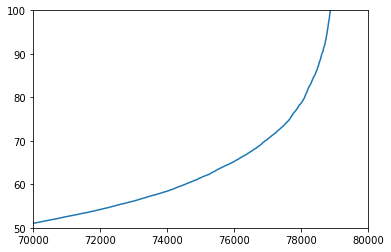

In [36]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

# n_neighbors will be equal to min_points and the dimensionality of the data frame
neighbors = NearestNeighbors(n_neighbors=31)
neighbors_fit = neighbors.fit(diab_ol)
distances, indices = neighbors_fit.kneighbors(diab_ol)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# To zoom in
plt.xlim([70000, 80000])
plt.ylim([50, 100])

K-distance plot above could help us to conclude that roughly 75 to be a good eps value

Check dimensionality of diab data frame

In [37]:
print(diab.shape)

(79147, 60)


**DBSCAN to discover outliers**

In [38]:
from sklearn.cluster import DBSCAN

# DBSCAN defaults: min_samples=5, eps=0.5

outlier_detection = DBSCAN(min_samples=31, eps=75)
clusters = outlier_detection.fit_predict(diab_ol)

total_outliers = list(clusters).count(-1)
print(clusters)
print("Total number of outliers: ", total_outliers)

[0 0 0 ... 0 0 0]
Total number of outliers:  4079


**Create a mask to remove outliers**

In [39]:
# Outliers are labelled as -1
mask = clusters != -1

# Select mask
diab_rm_ol = diab[mask]

print(diab_rm_ol.shape)

(75068, 60)


**Reassign diab data frame to remove outliers**

In [41]:
diab = diab_rm_ol

## Convert cleansed dataset

In [43]:
diab.to_excel('diab_cleansed.xlsx', index=False)